# Cerals' Rating Prediction 
### Multiple Linear Regression using Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cereals.CSV')
df.head()           

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [3]:
df.shape

(77, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          77 non-null     object 
 1   Manuf         77 non-null     object 
 2   Type          77 non-null     object 
 3   Calories      77 non-null     int64  
 4   Protein       77 non-null     int64  
 5   Fat           77 non-null     int64  
 6   Sodium        77 non-null     int64  
 7   Fiber         77 non-null     float64
 8   Carbo         76 non-null     float64
 9   Sugars        76 non-null     float64
 10  Potass        75 non-null     float64
 11  Vitamins      77 non-null     int64  
 12  Shelf         77 non-null     int64  
 13  Weight        77 non-null     float64
 14  Cups          77 non-null     float64
 15  Rating        77 non-null     float64
 16  Cold          77 non-null     int64  
 17  Nabisco       77 non-null     int64  
 18  Quaker        77 non-null     in

---
### Feature Pre-Processing
Replace Null values with mean

In [5]:
df1 = df
from sklearn.impute import SimpleImputer

# replace with mean
si = SimpleImputer(missing_values=np.nan, strategy='mean') 

# considering features only with Null values- Carbo, Sugars, Potass
si.fit(df1.iloc[:,8:11]) # fit the data parameters to the si object

# transform the data
corrected = si.transform(df1.iloc[:,8:11])

# change the data to original dataframe
df1.iloc[:,8:11] = pd.DataFrame(corrected)
# df1 is the dataframe after preprocessing (replace Null values with mean)

In [6]:
# Method 2
# df3 = df
# df3.iloc[:,8:11].fillna(df3.iloc[:,8:11].mean())
# df3.iloc[:,8:11]

---


### Feature selection:

*As per business requirements, List of all the nutritional values in dataset*
- Calories	
- Protein	
- Fat	
- Sodium	
- Fiber	
- Carbo	
- Sugars	
- Potass	
- Vitamins

Total = 9

In [7]:
#df2- considering only attributes that are needed for model training (nutritional values)
df2 = df1.iloc[:,[0,3,4,5,6,7,8,9,10,11,15]]
df2.head()

,Name,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.000000,25,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.000000,0,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.000000,25,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.000000,25,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,98.666667,25,34.384843


---

## Multiple_LinearRegression Class

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load Model accuracy functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# display prediction
from sklearn.metrics import PredictionErrorDisplay

In [9]:
class Multiple_LinearRegression:
    ''' Multiple_LinearRegression class is used to perform operations on the data and predict output
    df: pandas DataFrame object 
    X_column_name: list of Input columns Name 
    y_column_name: output column name
    '''
    def __init__(self,model_number: int, df:pd.DataFrame, X_column_name:list, 
                 y_column_name, test_size:0.2, random_state:42):
        self.model_number = model_number
        self.df = df
        self.X_column_name = X_column_name
        self.y_column_name = y_column_name
        self.test_size = test_size
        self.random_state = random_state
        self.X = self.df[X_column_name] # Input features
        self.y = self.df[y_column_name] # Output rating
        self.train_test_split()
        self.model()


    def train_test_split(self):
        ''' Function is used to split train-test data'''
        # train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, 
                                        test_size=self.test_size, random_state=self.random_state)
        
    def model(self):
        ''' Function is used to fit the model to train data & 
        predict the values for test data.
        '''

        # create model object
        self.lr = LinearRegression()

        # fit the train data into model
        self.lr.fit(self.X_train,self.y_train)

        # as per the parameters learned by the model, test the data
        self.y_pred = self.lr.predict(self.X_test)


    def error_score(self):
        ''' returns DataFrame object of error scores
        '''
        print('Model No. {} Details: -'.format(self.model_number))

        # create Dataframe metrics
        self.error_df = pd.DataFrame()
        self.error_df['metrics'] = ['r2_score', 'mean_absolute_error', 'mean_squared_error']
        self.error_df['error'] = [round(r2_score(self.y_test, self.y_pred),2),
                            round(mean_absolute_error(self.y_test, self.y_pred),2),
                            round(mean_squared_error(self.y_test, self.y_pred),2)]
        
        return self.error_df

    def coefficient(self):

        self.intercept = self.lr.intercept_
        self.coef = self.lr.coef_.tolist()

        # printing regression equation
        print('Rating =',round(self.intercept,2))
        for i,coef_name in enumerate(self.X_column_name):
            if self.coef[i] > 0:
                print('+',round(self.coef[i],2),'*',coef_name)
            else:
                print(round(self.coef[i],2),'*',coef_name)

    def plots(self):
        # Plot PredictionErrror graph
        PredictionErrorDisplay.from_predictions(y_true=self.y_test, y_pred=self.y_pred)
        plt.title('Predicted values of test data')

        PredictionErrorDisplay.from_estimator(self.lr,self.X,self.y)
        plt.title('Residual Values of Full Data set')
    
    def predict(self,X_new_test):
            ''' Predict the values of new input data '''
            return self.lr.predict(X_new_test[self.X_column_name])
        

---

Multi-Colinearlity is the state where some of the independent variables (predictors) used to predict a dependent variable has strong corelation with one other. It could create problems as independent variables has to to independent as per assumption in training a model.

As there are multiple predictor (dependent variables) to predict the rating of a Cereal, two common evaluation metrics used for detecting multicollinearity are:

__1. Correaltion Matrix Coefficient__
    - is the Magnitude of the Pearson's correlation coefficient signifies the strength of the relationship, with a higher value corresponding to a stronger relationship.


In [10]:
# The relationship between nutritional rating and the nine predictor variables using correlation.
corr_matrix = df2.iloc[:,1:].corr()
corr_matrix

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Rating
Calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257423,0.566062,-0.071991,0.265356,-0.689376
Protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.024160,-0.281905,0.562143,0.007335,0.470618
Fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.298074,0.300552,0.197823,-0.031156,-0.409284
Sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.290399,0.057425,-0.042312,0.361477,-0.401295
Fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380223,-0.138711,0.908647,-0.032243,0.584160
Carbo,0.257423,-0.024160,-0.298074,0.290399,-0.380223,1.000000,-0.471184,-0.358557,0.216854,0.088513
Sugars,0.566062,-0.281905,0.300552,0.057425,-0.138711,-0.471184,1.000000,0.001348,0.097179,-0.762181
Potass,-0.071991,0.562143,0.197823,-0.042312,0.908647,-0.358557,0.001348,1.000000,-0.005368,0.408320
Vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.216854,0.097179,-0.005368,1.000000,-0.240544
Rating,-0.689376,0.470618,-0.409284,-0.401295,0.584160,0.088513,-0.762181,0.408320,-0.240544,1.000000


__Plotting Heatmap__

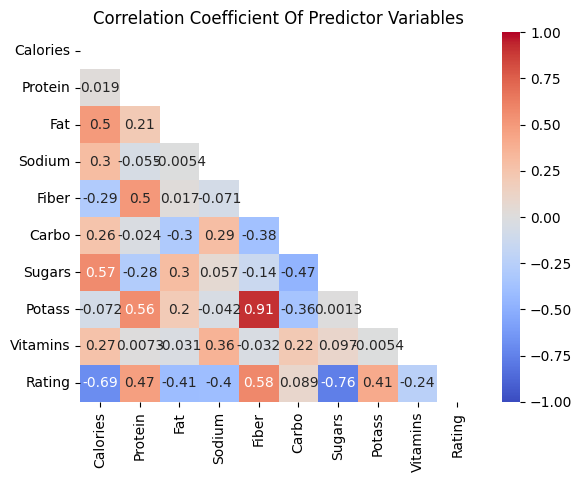

In [11]:
# hiding upper traingular region
mask = np.triu(np.ones_like(corr_matrix))

# plotting heatmap 
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, mask = mask, cmap='coolwarm')
plt.title('Correlation Coefficient Of Predictor Variables')
plt.show()

#### Findings from heatmap (correltion matrix)
##### _Colinearity with Rating_
- __Calories,Fiber,Sugars__ has high correlation coef. with rating (correlation coefficient greater than 0.5 or less than -0.5)
- __Carbo__ has very low correlation coef. with rating (correlation coefficient = 0.089)

##### _Colinearity with other independent variable_
Considering the correlation coefficient greater than 0.5 or less than -0.5 :

1. Potass is highly co-related with Fiber (0.91)
2. Potass with protein (0.56)
3. Sugars with calories (0.57) 

---

__2. Variance Inflation Factor (VIF)__
    - VIF is the ratio of the variance of the entire model to the variance of a model with only the particular feature in selection i.e contribution of the feature to predict the output.
    - VIF of 1 indicates that the feature has no correlation with any of the other features.
    - VIF value exceeding 5 or 10 is deemed to be too high. Any feature with such VIF values is likely to be contributing to multicollinearity.

To make decisions for removal of the features which have higher value of correlation coefficient with other independent variable, VIF is used

In [12]:
def calculate_vif(df:pd.DataFrame, features: list):
    ''' calculate_vif function is used to calculate vif(Variance Inflation Factor) 
    from given dataframe features.

    df : pandas DataFrame
    features: list of features to be considered for calculating VIF 
    
    returns a pandas dataframe object with 2 columns: Feature_Names & VIF'''
    
    dataframe = df[features]
    vif_values = np.diag(np.linalg.inv(np.corrcoef(dataframe.to_numpy(), rowvar=False)))

    vif_df = pd.DataFrame()
    vif_df['Feature_Names'] = dataframe.columns
    vif_df['VIF'] = vif_values

    return vif_df.sort_values(by='VIF', ascending=False)

# Method 2 (From StatsModel library) to calculate vif
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# X = df2[features]
# x = X.assign(const=1)
# pd.DataFrame([[x.columns[i],variance_inflation_factor(x.values,i)] for i in range(len(x.columns)-1)])

Among the 9 features - which to select & remove for training the model?

---
### For Model 1 - Considering all Nutritional Features
---

In [13]:
model_1_features = ['Calories',
                    'Protein',
                    'Fat',
                    'Sodium',
                    'Fiber',
                    'Carbo',
                    'Sugars',
                    'Potass',
                    'Vitamins']
md_1 = Multiple_LinearRegression(model_number=1, df=df2, X_column_name=model_1_features, 
                                y_column_name='Rating', 
                                test_size=0.2, random_state=42)

In [14]:
md_1.error_score()

Model No. 1 Details: -


,metrics,error
0,r2_score,0.99
1,mean_absolute_error,0.78
2,mean_squared_error,1.31


In [15]:
md_1.coefficient()

Rating = 56.74
-0.09 * Calories
+ 2.31 * Protein
-3.07 * Fat
-0.05 * Sodium
+ 3.04 * Fiber
+ 0.46 * Carbo
-1.37 * Sugars
-0.02 * Potass
-0.05 * Vitamins


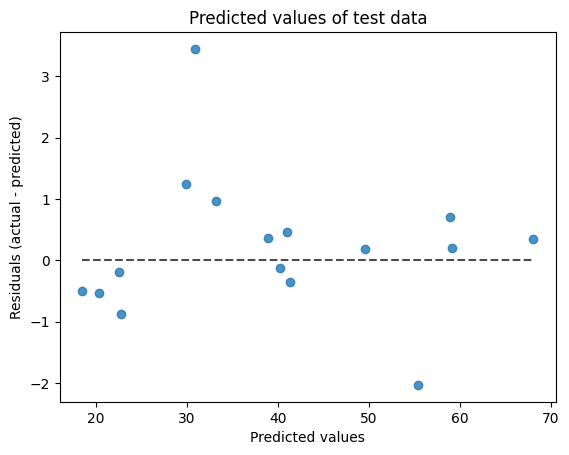

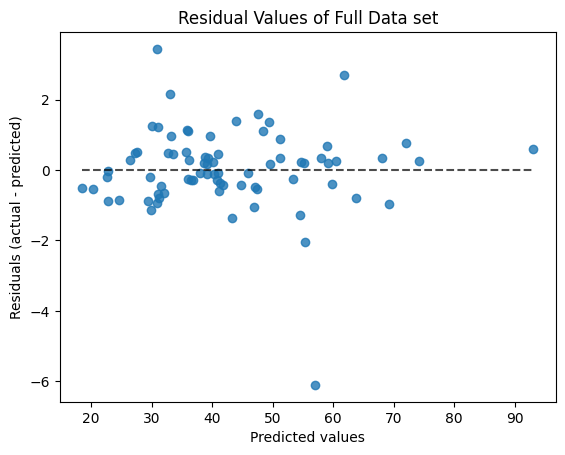

In [16]:
md_1.plots()

---
### For Model 2 - Considering Nutritional Features after performing only VIF
---

In [17]:
# all features
model_2_features = ['Calories',
                    'Protein',
                    'Fat',
                    'Sodium',
                    'Fiber',
                    'Carbo',
                    'Sugars',
                    'Potass',
                    'Vitamins']
calculate_vif(df2,model_2_features)

,Feature_Names,VIF
0,Calories,12.518834
6,Sugars,11.655789
5,Carbo,10.690550
4,Fiber,9.308605
7,Potass,8.807774
2,Fat,4.012622
1,Protein,2.184987
3,Sodium,1.290330
8,Vitamins,1.229869


In [18]:
# removing feature 1 by 1 
# Calories - VIF > 5 
model_2_features = ['Protein',
                    'Fat',
                    'Sodium',
                    'Fiber',
                    'Carbo',
                    'Sugars',
                    'Potass',
                    'Vitamins']
calculate_vif(df2,model_2_features)

,Feature_Names,VIF
3,Fiber,9.219768
6,Potass,8.783022
4,Carbo,2.414762
5,Sugars,2.125426
0,Protein,1.801059
1,Fat,1.476870
2,Sodium,1.281200
7,Vitamins,1.228690


In [19]:
# removing fiber - VIF > 9.2
model_2_features = ['Protein',
                    'Fat',
                    'Sodium',
                    'Carbo',
                    'Sugars',
                    'Potass',
                    'Vitamins']
calculate_vif(df2,model_2_features)

,Feature_Names,VIF
3,Carbo,1.925205
5,Potass,1.808251
0,Protein,1.797407
4,Sugars,1.711440
2,Sodium,1.270626
1,Fat,1.254801
6,Vitamins,1.222430


In [20]:
md_2 = Multiple_LinearRegression(model_number=2, df=df2, X_column_name=model_2_features, 
                                y_column_name='Rating', 
                                test_size=0.2, random_state=42)

In [21]:
md_2.error_score()

Model No. 2 Details: -


,metrics,error
0,r2_score,0.98
1,mean_absolute_error,1.66
2,mean_squared_error,4.31


In [22]:
md_2.coefficient()

Rating = 62.38
+ 1.81 * Protein
-4.79 * Fat
-0.05 * Sodium
-0.24 * Carbo
-2.01 * Sugars
+ 0.07 * Potass
-0.05 * Vitamins


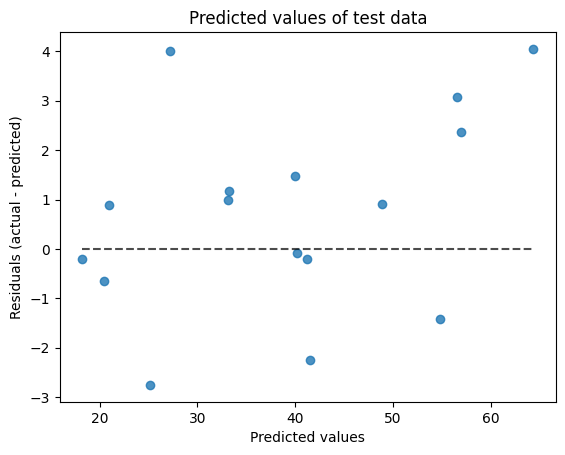

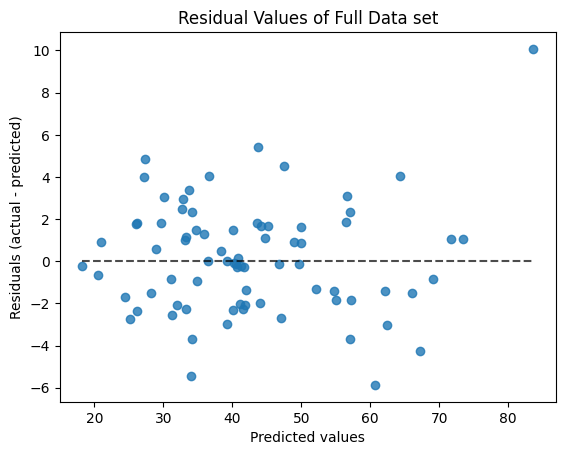

In [23]:
md_2.plots()

---
### For Model 3 - Considering Nutritional Features after deciding based on correlation matrix coefficeints on Rating 
---

As __Carbo__ has very low correlation coef. with rating (correlation coefficient = 0.089), ignoring only __Carbo__

In [24]:
model_3_features = ['Calories',
                    'Protein',
                    'Fat',
                    'Sodium',
                    'Fiber',
                    'Sugars',
                    'Potass',
                    'Vitamins']
md_3 = Multiple_LinearRegression(model_number=3, df=df2, X_column_name=model_3_features, 
                                y_column_name='Rating', 
                                test_size=0.2, random_state=42)

In [25]:
md_3.error_score()

Model No. 3 Details: -


,metrics,error
0,r2_score,0.99
1,mean_absolute_error,1.07
2,mean_squared_error,2.26


In [26]:
md_3.coefficient()

Rating = 58.33
+ 0.0 * Calories
+ 2.04 * Protein
-3.91 * Fat
-0.05 * Sodium
+ 2.9 * Fiber
-1.76 * Sugars
-0.02 * Potass
-0.05 * Vitamins


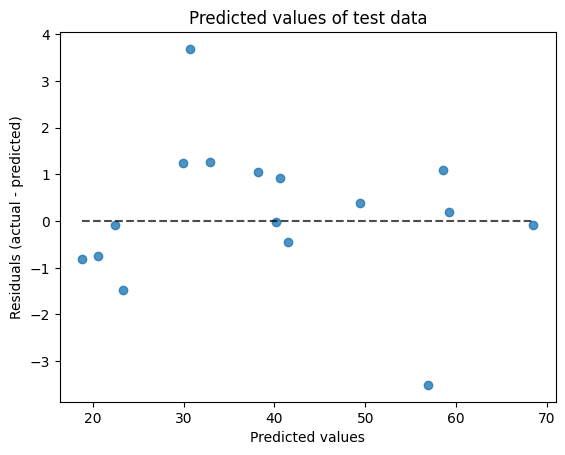

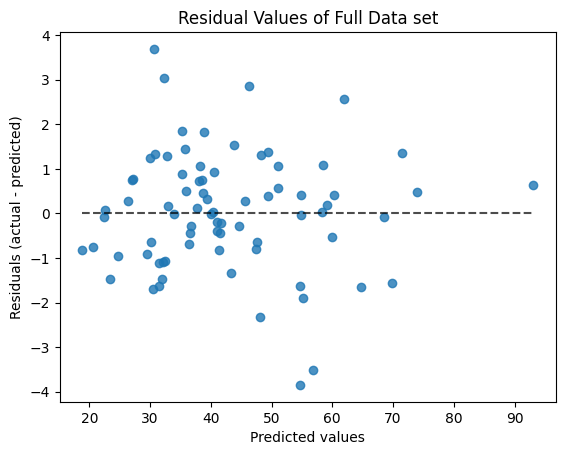

In [27]:
md_3.plots()

---
### For Model 4 - Considering Nutritional Features after deciding based on correlation matrix & multicollinearity VIF
---

As per the findings from heatmap (correltion matrix)
- __Calories,Fiber,Sugars__ has high correlation coef. with rating (correlation coefficient > 0.5)
- __Carbo__ has very low correlation coefficient = 0.089

##### _Colinearity with other independent variable_
Considering the correlation coefficient > 0.5 :

1. Potass is highly co-related with Fiber (0.91)
2. Potass with protein (0.56)
3. Sugars with calories (0.57) 

Ignoring only potass & calculating VIF

In [28]:
model_4_features = ['Calories',
                    'Fiber',
                    'Sugars',
                    'Protein',
                    'Sodium',
                    'Fat',
                    'Vitamins'
                    ]
calculate_vif(df2,model_4_features)

,Feature_Names,VIF
0,Calories,2.726395
2,Sugars,1.915254
3,Protein,1.815740
1,Fiber,1.691301
5,Fat,1.511314
4,Sodium,1.283260
6,Vitamins,1.222164


In [29]:

md_4 = Multiple_LinearRegression(model_number=4, df=df2, X_column_name=model_4_features, 
                                y_column_name='Rating', 
                                test_size=0.2, random_state=42)

In [30]:
md_4.error_score()

Model No. 4 Details: -


,metrics,error
0,r2_score,0.99
1,mean_absolute_error,1.04
2,mean_squared_error,1.94


In [31]:
md_4.coefficient()

Rating = 58.69
-0.0 * Calories
+ 2.44 * Fiber
-1.78 * Sugars
+ 1.92 * Protein
-0.05 * Sodium
-4.02 * Fat
-0.05 * Vitamins


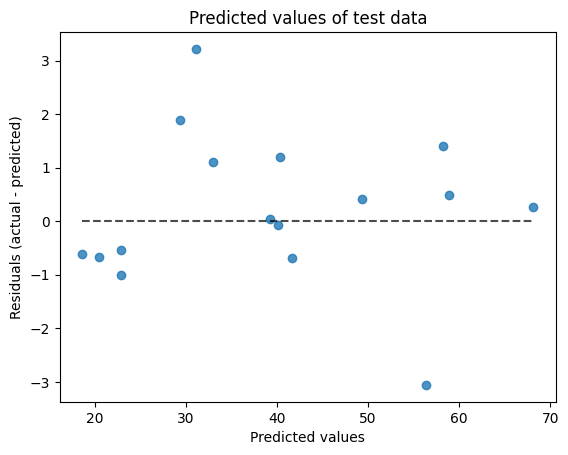

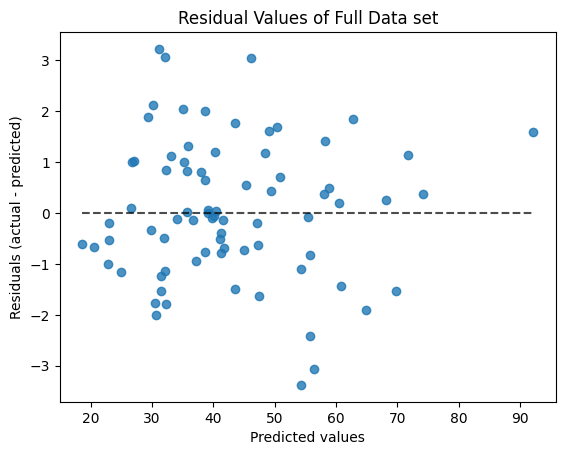

In [32]:
md_4.plots()

---
### Model Results
After training & testing models with changing features, it is better to select model 4 with all features except Potass 
Model 1 has low mean_absolute_error	- 0.78 & mean_squared_error - 1.31 compared to Model 4 with mean_absolute_error	- 1.04 & mean_squared_error	1.94, but it is not feasible to consider all features & train model as it is not always possible to give such a good result.
Model 4 gives output which is unbiased and can be considered in all tests.

---

Testing 2 cereals provided by Brand XYZ and provide rating to the cereals company
- Cereal A
- Cereal B

In [33]:
test_df = pd.read_excel("Brand XYZ cereals without ratings.xlsx")

In [34]:
test_df.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,Cereal A,X,C,90,3,0,210,5,13,5,...,1,0.67,,1,0,0,0,0,0,0
1,Cereal B,X,C,120,1,2,220,0,12,12,...,1,0.75,,1,0,0,0,0,0,0


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2 non-null      object 
 1   Manuf         2 non-null      object 
 2   Type          2 non-null      object 
 3   Calories      2 non-null      int64  
 4   Protein       2 non-null      int64  
 5   Fat           2 non-null      int64  
 6   Sodium        2 non-null      int64  
 7   Fiber         2 non-null      int64  
 8   Carbo         2 non-null      int64  
 9   Sugars        2 non-null      int64  
 10  Potass        2 non-null      int64  
 11  Vitamins      2 non-null      int64  
 12  Shelf         2 non-null      int64  
 13  Weight        2 non-null      int64  
 14  Cups          2 non-null      float64
 15  Rating        2 non-null      object 
 16  Cold          2 non-null      int64  
 17  Nabisco       2 non-null      int64  
 18  Quaker        2 non-null      int6

In [36]:
test = test_df.iloc[:,[3,4,5,6,7,8,9,11]]
test

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Vitamins
0,90,3,0,210,5,13,5,25
1,120,1,2,220,0,12,12,25


In [37]:
md_4.predict(test)

array([55.72693704, 18.65241249])

---
### Rating of Cereal A:- 55.72
### Rating of Cereal B:- 18.65
### It is good to select Cereal A for the company and can focus on selling it 
---